In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy as sp
import IPython.display as ipd
import numpy as np
import os

In [11]:
audio_path = '/home/destrox-907/Downloads/Measurements_1-19_06-FB-Mi3_B1.wav'
y , sr = librosa.load(audio_path,sr=None)
ipd.Audio(data=y, rate=sr)

In [12]:
y

array([ 6.2917984e-06, -7.6522228e-05,  1.6616397e-04, ...,
        1.2801528e-04,  4.8761962e-05,  1.0423064e-04],
      shape=(844544,), dtype=float32)

In [13]:
y.size

844544

In [14]:
sample_duration = 1/sr * len(y)
print(f"Sample's duration is:{sample_duration:.2f} seconds")

Sample's duration is:19.15 seconds


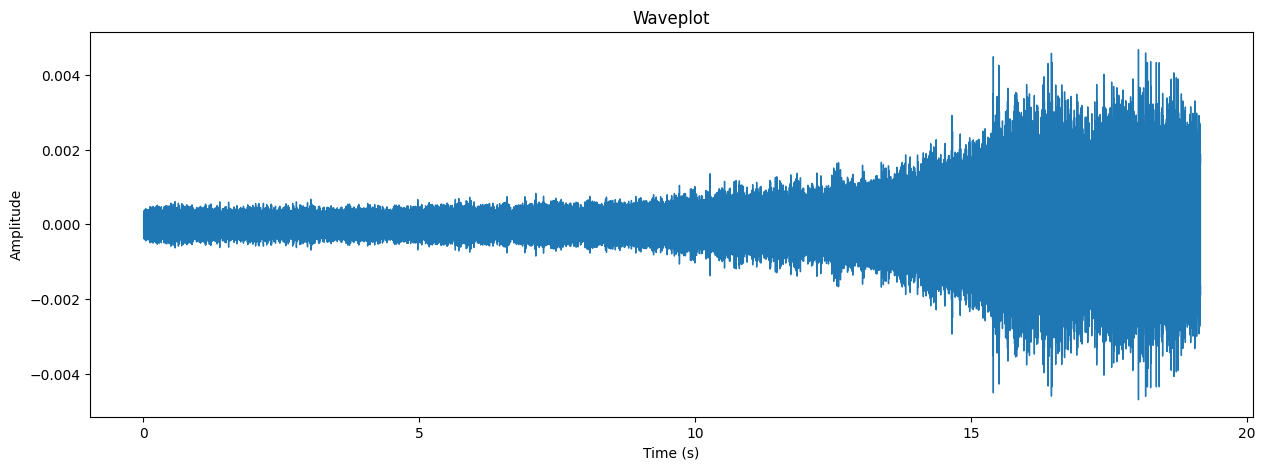

In [15]:
plt.figure(figsize=(15,17))
plt.subplot(3,1,1)
librosa.display.waveshow(y,sr=sr)
plt.title('Waveplot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [16]:
ft = sp.fft.fft(y)
mag = np.absolute(ft)
freq = np.linspace(0,sr,len(mag))

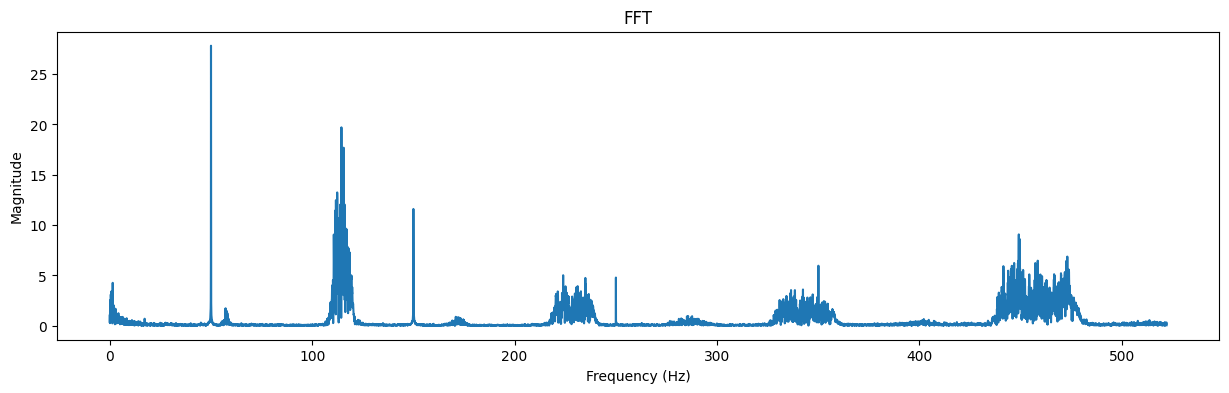

In [17]:
plt.figure(figsize=(15,4))
plt.plot(freq[:10000],mag[:10000])
plt.title('FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [18]:
len(y)

844544

In [10]:
d = 1/sr
d

4.5351473922902495e-05

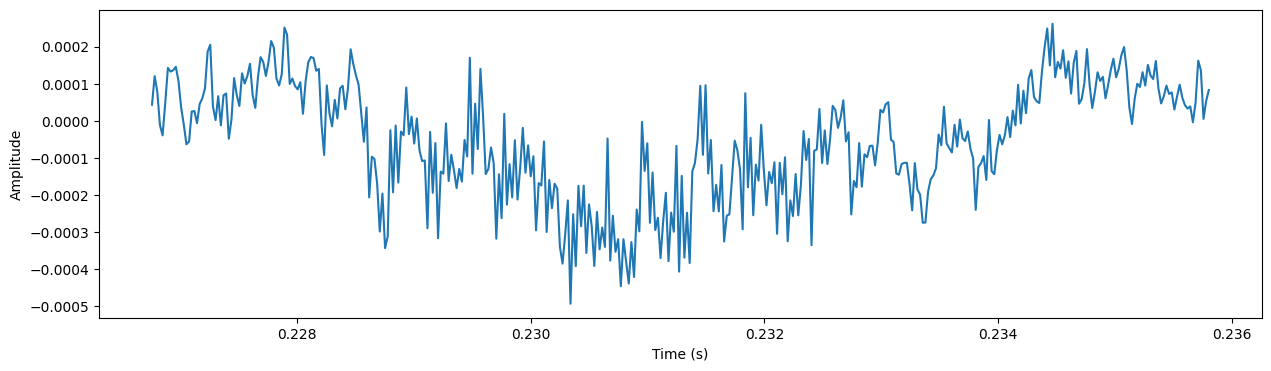

In [19]:
samples = range(len(y))
t = librosa.samples_to_time(samples,sr=sr)
plt.figure(figsize=(15,4)) 
plt.plot(t[10000:10400],y[10000:10400])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [20]:
ft = np.fft.fft(y)
ft

array([0.39782566+2.0816682e-17j, 0.81715137+7.3426932e-01j,
       0.1284547 +2.2328900e-01j, ..., 1.2044781 -1.3481772e+00j,
       0.1284547 -2.2328900e-01j, 0.81715137-7.3426932e-01j],
      shape=(844544,), dtype=complex64)

In [21]:
magnitude_spectrum = np.abs(ft)

In [22]:
def plot_magnitude_spectrum(signal,title,sr , f_ratio = 0.5):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)
    plt.figure(figsize=(15,4))
    frequency = np.linspace(0,sr,len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency)*f_ratio)
    plt.plot(frequency[:num_frequency_bins],magnitude_spectrum[:num_frequency_bins])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(title)
    plt.show()

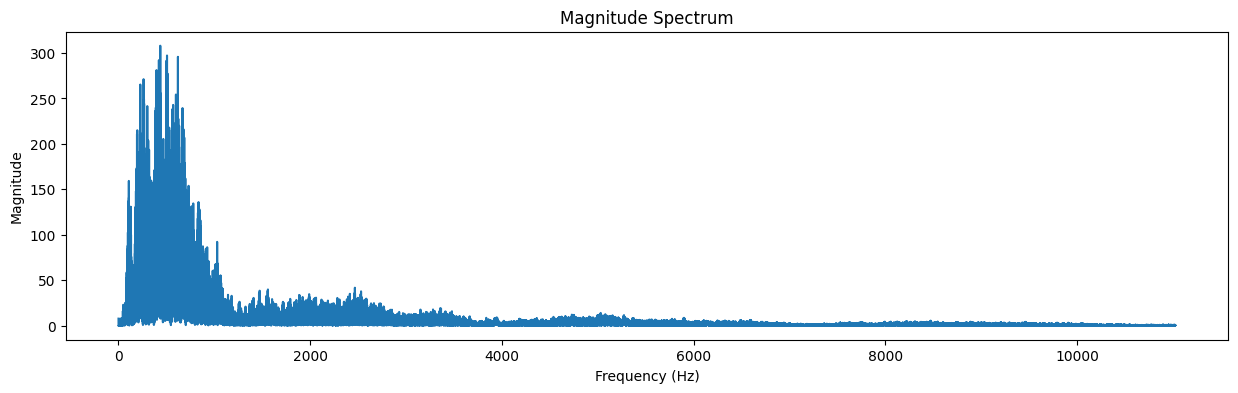

In [15]:
plot_magnitude_spectrum(y,'Magnitude Spectrum',sr)

In [23]:
Frame_size = 2048
hop_length = 512
S_signal = librosa.stft(y,n_fft=Frame_size,hop_length=hop_length)

In [24]:
S_signal.shape

(1025, 1650)

In [25]:
type(S_signal[0][0])

numpy.complex64

In [26]:
y_signal = np.abs(S_signal)**2

In [27]:
y_signal.shape

(1025, 1650)

In [28]:
type(y_signal[0][0])

numpy.float32

In [29]:
def plot_spectogram(signal,sr,hop_length,y_axis='linear'):
    plt.figure(figsize=(10,5))
    librosa.display.specshow(signal,sr=sr,x_axis='time',y_axis=y_axis,hop_length=hop_length)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectogram')
    plt.show()

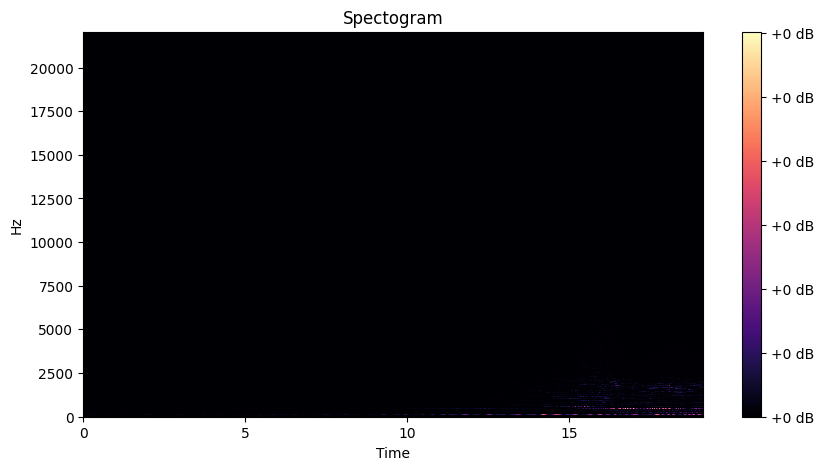

In [30]:
plot_spectogram(y_signal,sr,hop_length)

In [31]:
y_signal_log = librosa.power_to_db(y_signal)
y_signal_log.shape

(1025, 1650)

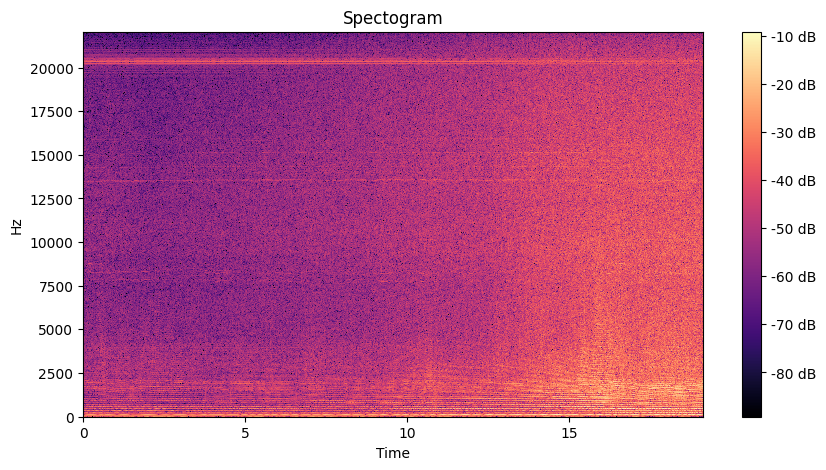

In [32]:
plot_spectogram(y_signal_log,sr,hop_length)

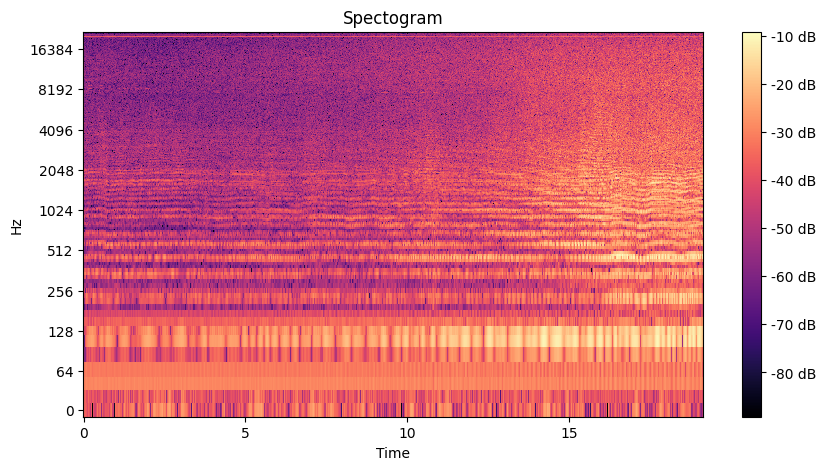

In [33]:
plot_spectogram(y_signal_log,sr,hop_length,y_axis='log')

In [34]:
filter_banks = librosa.filters.mel(n_fft=2048,sr=22050,n_mels=10)

In [35]:
filter_banks.shape

(10, 1025)

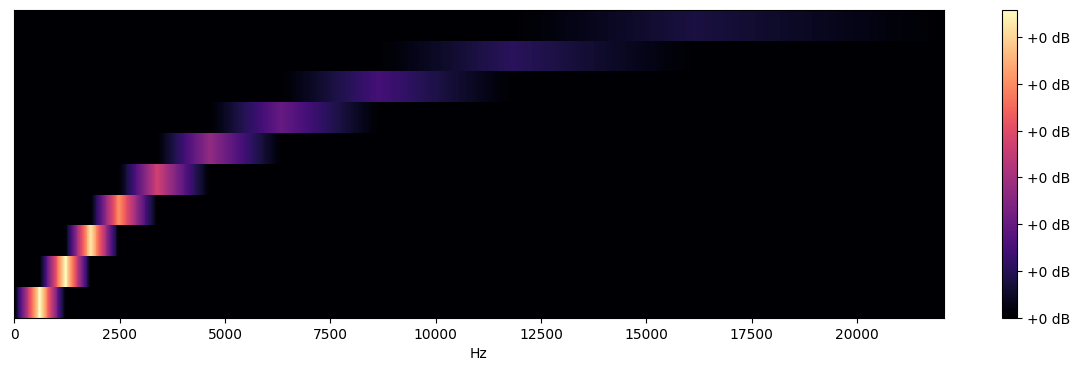

In [36]:
plt.figure(figsize=(15,4))
librosa.display.specshow(filter_banks,sr=sr,x_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [37]:
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

In [38]:
mel_spectrogram.shape

(10, 1650)

In [39]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

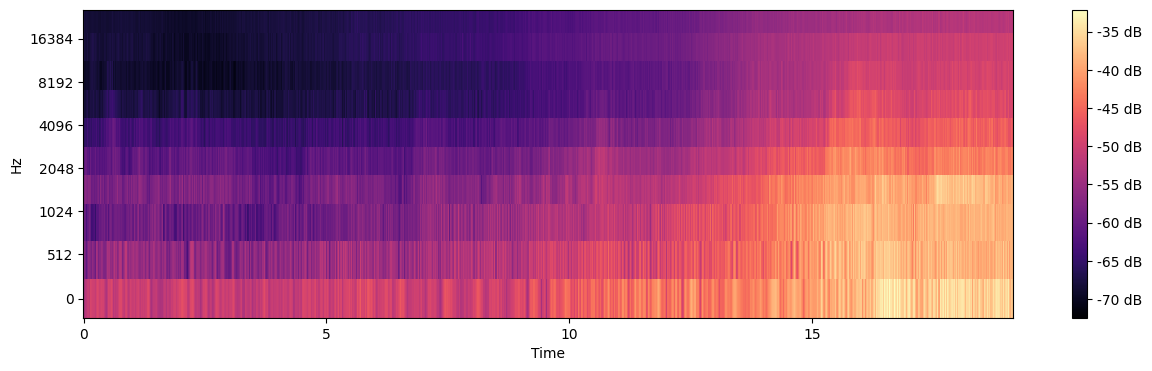

In [40]:
plt.figure(figsize=(15,4))
librosa.display.specshow(log_mel_spectrogram,sr=sr,x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [41]:
mfccs = librosa.feature.mfcc(y=y, n_mfcc=13, sr=sr)
mfccs.shape

(13, 1650)

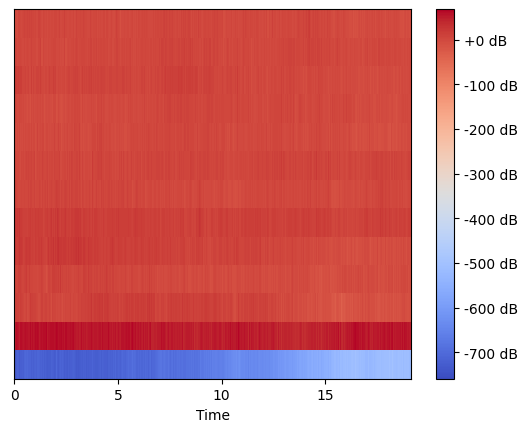

In [42]:
plt.figure.figsize=(25,10)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [43]:
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs,order=2)

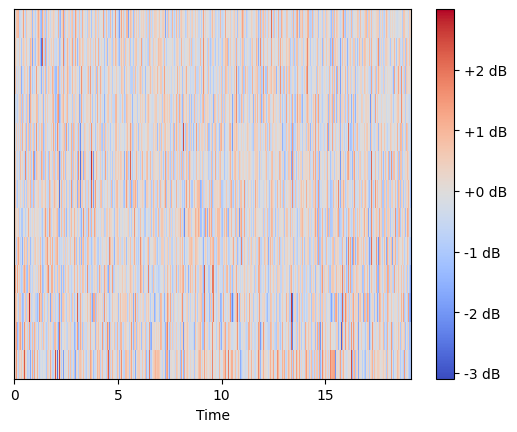

In [44]:
plt.figure.figsize=(25,10)
librosa.display.specshow(delta_mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()

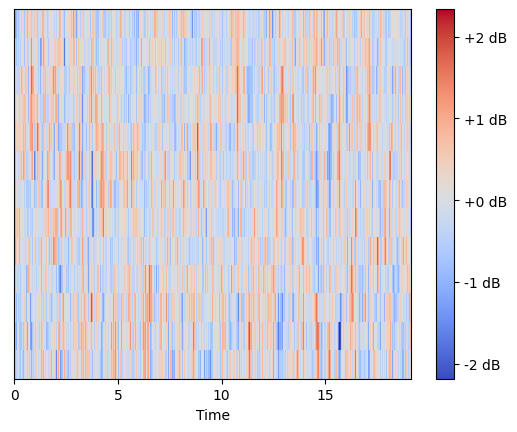

In [45]:
plt.figure.figsize=(25,10)
librosa.display.specshow(delta2_mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [46]:
combined_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs), axis=0)
combined_mfccs.shape

(39, 1650)